# 1. 라이브러리 및 데이터 가져오기

In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
#import seaborn as sns

cabage = pd.read_csv('C:/sa/week/cabbage_week.csv')

cabage.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),"2,490",1.657143,-3.242857,7.628571,0.442857,1061.77,"59,788","63,140,123","11,000","5,843,123","52,891,750",615.0,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),"2,392",-2.700000,-7.728571,2.900000,0.000000,1061.80,"59,788","63,140,123","11,000","5,843,123","52,891,750",615.0,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),"2,296",-1.128571,-5.742857,4.057143,0.414286,1080.35,"59,788","63,140,123","11,000","5,843,123","52,891,750",615.0,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),"2,246",-1.000000,-4.314286,9.100000,0.414286,1081.31,"59,788","63,140,123","11,000","5,843,123","52,891,750",615.0,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),"2,242",2.671429,-2.285714,8.085714,1.071429,1075.00,"59,788","63,140,123","11,000","5,843,123","52,891,750",615.0,83.296


In [2]:
cabage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week              557 non-null    object 
 1   retail price      556 non-null    object 
 2   avgTemp           557 non-null    float64
 3   minTemp           557 non-null    float64
 4   maxTemp           557 non-null    float64
 5   rainfall          557 non-null    float64
 6   exchange rate     557 non-null    float64
 7   export volume     552 non-null    object 
 8   export value      552 non-null    object 
 9   import volume     251 non-null    object 
 10  import value      251 non-null    object 
 11  production        522 non-null    object 
 12  cultivation area  535 non-null    float64
 13  market price      557 non-null    float64
dtypes: float64(7), object(7)
memory usage: 61.1+ KB


# 2. 데이터 전처리

### A. 쉼표제거 및 형식 변환

In [3]:
# 쉼표 제거 (쉼표 -> 공백)
for column in cabage.columns:
    if cabage[column].dtype == 'object':
        cabage[column] = cabage[column].str.replace(',','')

# 1열(날짜열) 제외하고 나머지 열들 숫자형 데이터로 변환
for column in cabage.select_dtypes(include=['object']).columns:
    if column != 'week':
        cabage[column] = pd.to_numeric(cabage[column])

#cabage = cabage.replace(0,np.nan)

cabage.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),2490.0,1.657143,-3.242857,7.628571,0.442857,1061.77,59788.0,63140123.0,11000.0,5843123.0,52891750.0,615.0,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),2392.0,-2.700000,-7.728571,2.900000,0.000000,1061.80,59788.0,63140123.0,11000.0,5843123.0,52891750.0,615.0,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),2296.0,-1.128571,-5.742857,4.057143,0.414286,1080.35,59788.0,63140123.0,11000.0,5843123.0,52891750.0,615.0,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),2246.0,-1.000000,-4.314286,9.100000,0.414286,1081.31,59788.0,63140123.0,11000.0,5843123.0,52891750.0,615.0,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),2242.0,2.671429,-2.285714,8.085714,1.071429,1075.00,59788.0,63140123.0,11000.0,5843123.0,52891750.0,615.0,83.296


## B. 결측치 처리

### 결측치가 많은 열은 삭제

In [4]:
# 결측치의 비율 계산.  비율이 절반이 넘어가는게 뭔지. 
nan_var = cabage.isna().sum()/len(cabage)
nan_var[nan_var>=0.5]

import volume     0.549372
import value      0.549372
dtype: float64

In [5]:
# 결측치 비율이 절반을 넘어가는 열을 삭제하고 확인하기. 
remove_col = nan_var[nan_var>=0.5].index
cabage=cabage.drop(remove_col, axis=1)
cabage.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),2490.0,1.657143,-3.242857,7.628571,0.442857,1061.77,59788.0,63140123.0,52891750.0,615.0,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),2392.0,-2.700000,-7.728571,2.900000,0.000000,1061.80,59788.0,63140123.0,52891750.0,615.0,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),2296.0,-1.128571,-5.742857,4.057143,0.414286,1080.35,59788.0,63140123.0,52891750.0,615.0,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),2246.0,-1.000000,-4.314286,9.100000,0.414286,1081.31,59788.0,63140123.0,52891750.0,615.0,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),2242.0,2.671429,-2.285714,8.085714,1.071429,1075.00,59788.0,63140123.0,52891750.0,615.0,83.296


In [6]:
# 각 열마다 결측치가 몇 개 있는지 확인.
cabage.isna().sum()

week                 0
retail price         1
avgTemp              0
minTemp              0
maxTemp              0
rainfall             0
exchange rate        0
export volume        5
export value         5
production          35
cultivation area    22
market price         0
dtype: int64

### 살아남은 열들의 결측치들을 평균값으로 채워넣기

In [7]:
from sklearn.impute import SimpleImputer

numeric_cols = cabage.select_dtypes(include=['number']).columns

# 결측치를 평균으로 채워넣기
imputer = SimpleImputer(strategy='mean')
cabage[numeric_cols] = imputer.fit_transform(cabage[numeric_cols])

# 채워넣고 결측치 개수 확인해보기.
cabage.isna().sum()

week                0
retail price        0
avgTemp             0
minTemp             0
maxTemp             0
rainfall            0
exchange rate       0
export volume       0
export value        0
production          0
cultivation area    0
market price        0
dtype: int64

# 3. 모델링

### A. 피처 선택

In [8]:
# 독립변수
X = cabage[['exchange rate','avgTemp','maxTemp','minTemp','rainfall','export volume ','export value','production',
          'cultivation area', 'market price']]

# 종속변수
y =cabage['retail price']

# 독립변수들 리스트화 시키기
X_names = X.columns
X_names

Index(['exchange rate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall',
       'export volume ', 'export value', 'production', 'cultivation area',
       'market price'],
      dtype='object')

### (1) SelectKBest

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression

sel_fr = SelectKBest(f_regression, k=3).fit(X, y)
print('\nf_regression: ') #F-value 회귀

print()
print('Selected features: ', [X_names[i] for i in sel_fr.get_support(indices=True)]) 


f_regression: 

Selected features:  ['minTemp', 'export volume ', 'market price']


### (2) SFS

In [10]:
# SFS(Sequential Feature Selector) : 순차적으로 특성을 선택하는 방법

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=4, direction='backward')

sfs.fit(X,y)

X_selected = sfs.transform(X)
X_selected_names = [X_names[i] for i in sfs.get_support(indices=True)]

print(f'{X_selected_names = }')

X_selected_names = ['minTemp', 'production', 'cultivation area', 'market price']


### (3) rfe

In [11]:
from sklearn.feature_selection import RFE ,RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [12]:
# estimator = SVR(kernel="linear")

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

# 선택 특징 변환
X_selected = selector.transform(X)
# 선택된 이름 가져오기
X_selected_names = [X_names[i] for i in selector.get_support(indices=True)]

# 출력
print(f'{X_selected_names = }')
print()

X_selected_names = ['avgTemp', 'maxTemp', 'minTemp']



### (4) rfecv

In [13]:
#rfecv

estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)

X_selected = selector.transform(X)
X_selected_names = [X_names[i] for i in selector.get_support(indices=True)]

print(f'{X_selected_names = }')

X_selected_names = ['avgTemp', 'maxTemp', 'minTemp', 'rainfall', 'market price']


# 4. 모델별 성능평가

## (1) lstm

In [14]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = cabage[['minTemp', 'avgTemp', 'export volume ', 'export value', 'market price']].values
y = cabage[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    lstm_model = Sequential()
    lstm_model.add(LSTM(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    lstm_model.add(Dropout(0.1))
    lstm_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.1)
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=140, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = lstm_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')

Fold 1
Epoch 1/140


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 58ms/step - loss: 0.1747 - mae: 0.2075 - val_loss: 0.0318 - val_mae: 0.1528
Epoch 2/140
45/45 - 0s - 5ms/step - loss: 0.0200 - mae: 0.1036 - val_loss: 0.0114 - val_mae: 0.0765
Epoch 3/140
45/45 - 0s - 4ms/step - loss: 0.0190 - mae: 0.1019 - val_loss: 0.0154 - val_mae: 0.0942
Epoch 4/140
45/45 - 0s - 4ms/step - loss: 0.0178 - mae: 0.0974 - val_loss: 0.0118 - val_mae: 0.0828
Epoch 5/140
45/45 - 0s - 4ms/step - loss: 0.0155 - mae: 0.0904 - val_loss: 0.0101 - val_mae: 0.0714
Epoch 6/140
45/45 - 0s - 4ms/step - loss: 0.0143 - mae: 0.0840 - val_loss: 0.0110 - val_mae: 0.0804
Epoch 7/140
45/45 - 0s - 5ms/step - loss: 0.0146 - mae: 0.0909 - val_loss: 0.0173 - val_mae: 0.1110
Epoch 8/140
45/45 - 0s - 4ms/step - loss: 0.0151 - mae: 0.0891 - val_loss: 0.0088 - val_mae: 0.0669
Epoch 9/140
45/45 - 0s - 4ms/step - loss: 0.0141 - mae: 0.0850 - val_loss: 0.0081 - val_mae: 0.0648
Epoch 10/140
45/45 - 0s - 4ms/step - loss: 0.0127 - mae: 0.0822 - val_loss: 0.0099 - val_mae: 0.0722
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 57ms/step - loss: 0.1042 - mae: 0.1884 - val_loss: 0.0138 - val_mae: 0.0866
Epoch 2/140
45/45 - 0s - 4ms/step - loss: 0.0161 - mae: 0.0906 - val_loss: 0.0093 - val_mae: 0.0801
Epoch 3/140
45/45 - 0s - 5ms/step - loss: 0.0148 - mae: 0.0865 - val_loss: 0.0092 - val_mae: 0.0795
Epoch 4/140
45/45 - 0s - 4ms/step - loss: 0.0146 - mae: 0.0877 - val_loss: 0.0122 - val_mae: 0.0934
Epoch 5/140
45/45 - 0s - 4ms/step - loss: 0.0160 - mae: 0.0914 - val_loss: 0.0083 - val_mae: 0.0707
Epoch 6/140
45/45 - 0s - 4ms/step - loss: 0.0145 - mae: 0.0878 - val_loss: 0.0104 - val_mae: 0.0752
Epoch 7/140
45/45 - 0s - 5ms/step - loss: 0.0123 - mae: 0.0799 - val_loss: 0.0083 - val_mae: 0.0717
Epoch 8/140
45/45 - 0s - 7ms/step - loss: 0.0133 - mae: 0.0825 - val_loss: 0.0075 - val_mae: 0.0688
Epoch 9/140
45/45 - 0s - 7ms/step - loss: 0.0120 - mae: 0.0765 - val_loss: 0.0086 - val_mae: 0.0716
Epoch 10/140
45/45 - 0s - 7ms/step - loss: 0.0125 - mae: 0.0805 - val_loss: 0.0102 - val_mae: 0.0761
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/140
45/45 - 3s - 58ms/step - loss: 0.0786 - mae: 0.1604 - val_loss: 0.0225 - val_mae: 0.1060
Epoch 2/140
45/45 - 0s - 4ms/step - loss: 0.0163 - mae: 0.0946 - val_loss: 0.0181 - val_mae: 0.0914
Epoch 3/140
45/45 - 0s - 4ms/step - loss: 0.0124 - mae: 0.0815 - val_loss: 0.0195 - val_mae: 0.1012
Epoch 4/140
45/45 - 0s - 4ms/step - loss: 0.0166 - mae: 0.0939 - val_loss: 0.0163 - val_mae: 0.0876
Epoch 5/140
45/45 - 0s - 4ms/step - loss: 0.0134 - mae: 0.0836 - val_loss: 0.0173 - val_mae: 0.0961
Epoch 6/140
45/45 - 0s - 4ms/step - loss: 0.0111 - mae: 0.0787 - val_loss: 0.0170 - val_mae: 0.0958
Epoch 7/140
45/45 - 0s - 4ms/step - loss: 0.0118 - mae: 0.0827 - val_loss: 0.0206 - val_mae: 0.1153
Epoch 8/140
45/45 - 0s - 4ms/step - loss: 0.0113 - mae: 0.0788 - val_loss: 0.0149 - val_mae: 0.0789
Epoch 9/140
45/45 - 0s - 4ms/step - loss: 0.0101 - mae: 0.0746 - val_loss: 0.0167 - val_mae: 0.0894
Epoch 10/140
45/45 - 0s - 4ms/step - loss: 0.0132 - mae: 0.0825 - val_loss: 0.0157 - val_mae: 0.091

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 57ms/step - loss: 0.0624 - mae: 0.1577 - val_loss: 0.0174 - val_mae: 0.0907
Epoch 2/140
45/45 - 0s - 4ms/step - loss: 0.0183 - mae: 0.1004 - val_loss: 0.0170 - val_mae: 0.0903
Epoch 3/140
45/45 - 0s - 4ms/step - loss: 0.0156 - mae: 0.0930 - val_loss: 0.0137 - val_mae: 0.0762
Epoch 4/140
45/45 - 0s - 4ms/step - loss: 0.0151 - mae: 0.0913 - val_loss: 0.0131 - val_mae: 0.0760
Epoch 5/140
45/45 - 0s - 7ms/step - loss: 0.0146 - mae: 0.0910 - val_loss: 0.0167 - val_mae: 0.0976
Epoch 6/140
45/45 - 0s - 6ms/step - loss: 0.0152 - mae: 0.0906 - val_loss: 0.0177 - val_mae: 0.0875
Epoch 7/140
45/45 - 0s - 7ms/step - loss: 0.0128 - mae: 0.0832 - val_loss: 0.0103 - val_mae: 0.0741
Epoch 8/140
45/45 - 0s - 4ms/step - loss: 0.0145 - mae: 0.0908 - val_loss: 0.0112 - val_mae: 0.0760
Epoch 9/140
45/45 - 0s - 4ms/step - loss: 0.0132 - mae: 0.0845 - val_loss: 0.0101 - val_mae: 0.0661
Epoch 10/140
45/45 - 0s - 4ms/step - loss: 0.0115 - mae: 0.0783 - val_loss: 0.0103 - val_mae: 0.0748
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 57ms/step - loss: 0.0797 - mae: 0.1815 - val_loss: 0.0267 - val_mae: 0.1231
Epoch 2/140
45/45 - 0s - 4ms/step - loss: 0.0211 - mae: 0.1065 - val_loss: 0.0205 - val_mae: 0.1051
Epoch 3/140
45/45 - 0s - 4ms/step - loss: 0.0157 - mae: 0.0898 - val_loss: 0.0181 - val_mae: 0.1016
Epoch 4/140
45/45 - 0s - 5ms/step - loss: 0.0145 - mae: 0.0879 - val_loss: 0.0156 - val_mae: 0.0928
Epoch 5/140
45/45 - 0s - 4ms/step - loss: 0.0136 - mae: 0.0843 - val_loss: 0.0129 - val_mae: 0.0876
Epoch 6/140
45/45 - 0s - 5ms/step - loss: 0.0146 - mae: 0.0887 - val_loss: 0.0172 - val_mae: 0.0927
Epoch 7/140
45/45 - 0s - 5ms/step - loss: 0.0127 - mae: 0.0827 - val_loss: 0.0130 - val_mae: 0.0834
Epoch 8/140
45/45 - 0s - 7ms/step - loss: 0.0139 - mae: 0.0836 - val_loss: 0.0135 - val_mae: 0.0927
Epoch 9/140
45/45 - 0s - 5ms/step - loss: 0.0138 - mae: 0.0851 - val_loss: 0.0121 - val_mae: 0.0826
Epoch 10/140
45/45 - 0s - 4ms/step - loss: 0.0124 - mae: 0.0805 - val_loss: 0.0201 - val_mae: 0.0963
Epoch 11/1

In [15]:
# 4주간 미래 예측 함수 정의  [이게 바꾼 버전이긴 하다만,,]
def predict_future_weeks(model, initial_data, scalerX, scalerY, weeks=4):
    predictions = []
    
    # 데이터를 모델 입력 형식으로 정규화하고 3D로 변형
    current_data = scalerX.transform(initial_data).reshape((1, initial_data.shape[1], 1))
    
    for week in range(weeks):
        # 모델을 사용해 예측
        predicted_scaled = model.predict(current_data)
        predicted_price = scalerY.inverse_transform(predicted_scaled).flatten()[0]
        
        # 예측 결과 저장
        predictions.append(predicted_price)
        
        # 다음 주차 예측을 위한 입력 데이터 갱신
        current_data = np.append(current_data[:, 1:], predicted_scaled.reshape(1, 1, 1), axis=1)
    
    return predictions

# 최종 학습된 모델로 예측 수행 예시
# 여기서 initial_data는 예측 시작 시점의 데이터입니다.
initial_data = cabage[['minTemp', 'avgTemp', 'export volume ', 'export value', 'market price']].values[-1].reshape(1, -1)
predicted_prices = predict_future_weeks(lstm_model, initial_data, scalerX, scalerY, weeks=4)

# 예측 결과 출력
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Predicted Retail Price'])
predicted_prices_df.index = pd.date_range(start='2024-09-01', periods=4, freq='W-SUN')
print(predicted_prices_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
            Predicted Retail Price
2024-09-01             4622.473633
2024-09-08             3695.060303
2024-09-15             2767.500732
2024-09-22             3116.054688


In [16]:
# 마지막 학습 데이터의 마지막 주차 가져오기
last_data = cabage.iloc[-1][['minTemp', 'avgTemp', 'export volume ', 'export value', 'market price']].values.reshape(1, -1)

predicted_prices = []

# 4주 예측
for week in range(4):
    # 현재 데이터를 LSTM 입력 형식으로 변형
    last_data_scaled = scalerX.transform(last_data)  # 2D 배열로 변환됨
    last_data_scaled = last_data_scaled.reshape((1, last_data_scaled.shape[1], 1))

    # 가격 예측
    predicted_price_scaled = lstm_model.predict(last_data_scaled)
    predicted_price = scalerY.inverse_transform(predicted_price_scaled.reshape(-1, 1)).flatten()

    # 예측값 저장
    predicted_prices.append(predicted_price[0])

    # 다음 주차 입력 데이터 갱신 (예측한 값을 포함)
    last_data = np.array([last_data[0][0], last_data[0][1], last_data[0][2], last_data[0][3], predicted_price[0]])  # 기존 데이터와 예측값 결합
    last_data = last_data.reshape(1, -1)  # 2D 배열로 변환

# 결과 출력
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Predicted Retail Price'])
predicted_prices_df.index = pd.date_range(start='2024-09-01', periods=4, freq='W-SUN')  # 주간 데이터 인덱스  
print(predicted_prices_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
            Predicted Retail Price
2024-09-01             4622.473633
2024-09-08             3568.803955
2024-09-15             3568.803955
2024-09-22             3568.803955


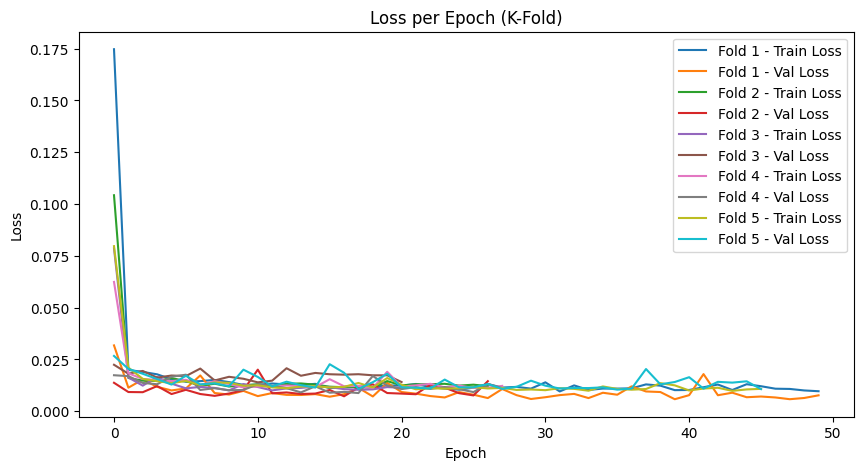

In [17]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### lstm 성능평가

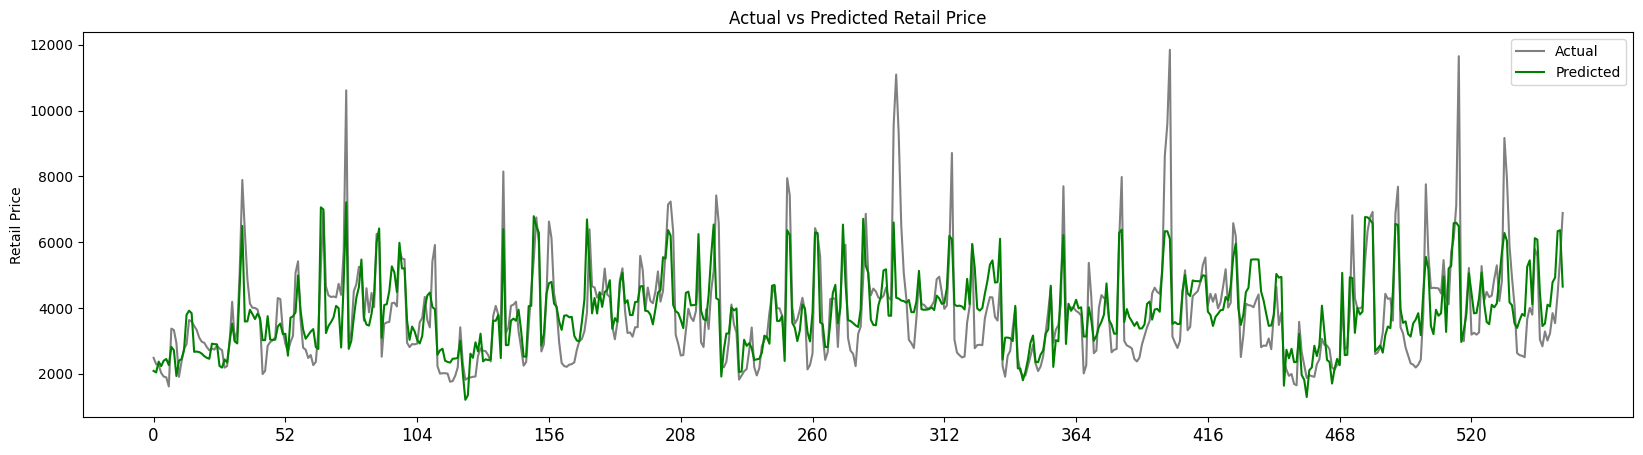

In [18]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()


## (2) GRU 

In [19]:
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping  # EarlyStopping 임포트
from tensorflow.keras.losses import Huber


# 데이터 준비
X = cabage[['minTemp', 'avgTemp', 'export volume ', 'export value', 'market price']].values
y = cabage[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    gru_model = Sequential()
    gru_model.add(GRU(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    gru_model.add(Dropout(0.1))
    gru_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.1)
    gru_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=140, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = gru_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')

Fold 1
Epoch 1/140


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 63ms/step - loss: 0.2003 - mae: 0.3094 - val_loss: 0.0427 - val_mae: 0.1654
Epoch 2/140
45/45 - 0s - 11ms/step - loss: 0.0299 - mae: 0.1295 - val_loss: 0.0204 - val_mae: 0.1177
Epoch 3/140
45/45 - 0s - 7ms/step - loss: 0.0229 - mae: 0.1109 - val_loss: 0.0135 - val_mae: 0.0875
Epoch 4/140
45/45 - 0s - 7ms/step - loss: 0.0193 - mae: 0.1025 - val_loss: 0.0118 - val_mae: 0.0802
Epoch 5/140
45/45 - 0s - 4ms/step - loss: 0.0170 - mae: 0.0959 - val_loss: 0.0199 - val_mae: 0.1172
Epoch 6/140
45/45 - 0s - 4ms/step - loss: 0.0208 - mae: 0.1091 - val_loss: 0.0213 - val_mae: 0.1202
Epoch 7/140
45/45 - 0s - 4ms/step - loss: 0.0188 - mae: 0.1008 - val_loss: 0.0122 - val_mae: 0.0791
Epoch 8/140
45/45 - 0s - 4ms/step - loss: 0.0183 - mae: 0.1011 - val_loss: 0.0117 - val_mae: 0.0773
Epoch 9/140
45/45 - 0s - 5ms/step - loss: 0.0175 - mae: 0.0992 - val_loss: 0.0129 - val_mae: 0.0787
Epoch 10/140
45/45 - 0s - 5ms/step - loss: 0.0167 - mae: 0.0934 - val_loss: 0.0175 - val_mae: 0.1105
Epoch 11/

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 70ms/step - loss: 0.0916 - mae: 0.2050 - val_loss: 0.0102 - val_mae: 0.0811
Epoch 2/140
45/45 - 0s - 10ms/step - loss: 0.0207 - mae: 0.1080 - val_loss: 0.0154 - val_mae: 0.1003
Epoch 3/140
45/45 - 0s - 5ms/step - loss: 0.0186 - mae: 0.0959 - val_loss: 0.0098 - val_mae: 0.0777
Epoch 4/140
45/45 - 0s - 7ms/step - loss: 0.0168 - mae: 0.0928 - val_loss: 0.0083 - val_mae: 0.0734
Epoch 5/140
45/45 - 0s - 6ms/step - loss: 0.0161 - mae: 0.0895 - val_loss: 0.0122 - val_mae: 0.0835
Epoch 6/140
45/45 - 0s - 5ms/step - loss: 0.0156 - mae: 0.0888 - val_loss: 0.0161 - val_mae: 0.1067
Epoch 7/140
45/45 - 0s - 5ms/step - loss: 0.0200 - mae: 0.1024 - val_loss: 0.0157 - val_mae: 0.0993
Epoch 8/140
45/45 - 0s - 4ms/step - loss: 0.0185 - mae: 0.0956 - val_loss: 0.0096 - val_mae: 0.0775
Epoch 9/140
45/45 - 0s - 5ms/step - loss: 0.0146 - mae: 0.0888 - val_loss: 0.0115 - val_mae: 0.0884
Epoch 10/140
45/45 - 0s - 5ms/step - loss: 0.0138 - mae: 0.0846 - val_loss: 0.0111 - val_mae: 0.0846
Epoch 11/

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 64ms/step - loss: 0.0765 - mae: 0.1841 - val_loss: 0.0191 - val_mae: 0.0976
Epoch 2/140
45/45 - 0s - 5ms/step - loss: 0.0182 - mae: 0.1025 - val_loss: 0.0234 - val_mae: 0.1070
Epoch 3/140
45/45 - 0s - 5ms/step - loss: 0.0159 - mae: 0.0958 - val_loss: 0.0192 - val_mae: 0.0914
Epoch 4/140
45/45 - 0s - 5ms/step - loss: 0.0155 - mae: 0.0929 - val_loss: 0.0225 - val_mae: 0.0999
Epoch 5/140
45/45 - 0s - 5ms/step - loss: 0.0177 - mae: 0.1002 - val_loss: 0.0176 - val_mae: 0.0932
Epoch 6/140
45/45 - 0s - 5ms/step - loss: 0.0166 - mae: 0.0983 - val_loss: 0.0164 - val_mae: 0.0890
Epoch 7/140
45/45 - 0s - 5ms/step - loss: 0.0123 - mae: 0.0814 - val_loss: 0.0151 - val_mae: 0.0828
Epoch 8/140
45/45 - 0s - 5ms/step - loss: 0.0120 - mae: 0.0814 - val_loss: 0.0146 - val_mae: 0.0764
Epoch 9/140
45/45 - 0s - 5ms/step - loss: 0.0116 - mae: 0.0794 - val_loss: 0.0181 - val_mae: 0.0892
Epoch 10/140
45/45 - 0s - 5ms/step - loss: 0.0109 - mae: 0.0761 - val_loss: 0.0165 - val_mae: 0.0821
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 64ms/step - loss: 0.1519 - mae: 0.2759 - val_loss: 0.0211 - val_mae: 0.0962
Epoch 2/140
45/45 - 0s - 5ms/step - loss: 0.0240 - mae: 0.1163 - val_loss: 0.0172 - val_mae: 0.0917
Epoch 3/140
45/45 - 0s - 5ms/step - loss: 0.0196 - mae: 0.1041 - val_loss: 0.0172 - val_mae: 0.0984
Epoch 4/140
45/45 - 0s - 5ms/step - loss: 0.0191 - mae: 0.1051 - val_loss: 0.0152 - val_mae: 0.0882
Epoch 5/140
45/45 - 0s - 5ms/step - loss: 0.0165 - mae: 0.0957 - val_loss: 0.0162 - val_mae: 0.0861
Epoch 6/140
45/45 - 0s - 5ms/step - loss: 0.0188 - mae: 0.1032 - val_loss: 0.0156 - val_mae: 0.0907
Epoch 7/140
45/45 - 0s - 5ms/step - loss: 0.0141 - mae: 0.0860 - val_loss: 0.0134 - val_mae: 0.0777
Epoch 8/140
45/45 - 0s - 5ms/step - loss: 0.0144 - mae: 0.0890 - val_loss: 0.0126 - val_mae: 0.0737
Epoch 9/140
45/45 - 0s - 5ms/step - loss: 0.0151 - mae: 0.0880 - val_loss: 0.0118 - val_mae: 0.0729
Epoch 10/140
45/45 - 0s - 7ms/step - loss: 0.0126 - mae: 0.0798 - val_loss: 0.0119 - val_mae: 0.0791
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 66ms/step - loss: 0.0980 - mae: 0.2297 - val_loss: 0.0466 - val_mae: 0.1514
Epoch 2/140
45/45 - 0s - 5ms/step - loss: 0.0266 - mae: 0.1211 - val_loss: 0.0368 - val_mae: 0.1295
Epoch 3/140
45/45 - 0s - 5ms/step - loss: 0.0210 - mae: 0.1096 - val_loss: 0.0323 - val_mae: 0.1216
Epoch 4/140
45/45 - 0s - 5ms/step - loss: 0.0228 - mae: 0.1121 - val_loss: 0.0229 - val_mae: 0.1104
Epoch 5/140
45/45 - 0s - 5ms/step - loss: 0.0182 - mae: 0.0971 - val_loss: 0.0186 - val_mae: 0.1079
Epoch 6/140
45/45 - 0s - 5ms/step - loss: 0.0170 - mae: 0.0984 - val_loss: 0.0213 - val_mae: 0.1048
Epoch 7/140
45/45 - 0s - 5ms/step - loss: 0.0156 - mae: 0.0919 - val_loss: 0.0223 - val_mae: 0.1044
Epoch 8/140
45/45 - 0s - 7ms/step - loss: 0.0159 - mae: 0.0919 - val_loss: 0.0217 - val_mae: 0.1236
Epoch 9/140
45/45 - 0s - 5ms/step - loss: 0.0160 - mae: 0.0923 - val_loss: 0.0149 - val_mae: 0.0899
Epoch 10/140
45/45 - 0s - 5ms/step - loss: 0.0134 - mae: 0.0846 - val_loss: 0.0140 - val_mae: 0.0912
Epoch 11/1

In [ ]:
def predict_future_weeks_extended(model, initial_data, scalerX, scalerY, weeks=13):
    predictions = []
    
    # 데이터를 모델 입력 형식으로 정규화하고 3D로 변형
    current_data = scalerX.transform(initial_data).reshape((1, initial_data.shape[1], 1))
    
    for week in range(weeks):
        # 모델을 사용해 예측
        predicted_scaled = model.predict(current_data)
        predicted_price = scalerY.inverse_transform(predicted_scaled).flatten()[0]
        
        # 예측 결과 저장
        predictions.append(predicted_price)
        
        # 다음 주차 예측을 위한 입력 데이터 갱신
        current_data = np.append(current_data[:, 1:], predicted_scaled.reshape(1, 1, 1), axis=1)
    
    return predictions

# 예측을 100번 수행하고 평균값 계산
num_predictions = 100
all_predictions = []

# 초기 데이터 (마지막 주 데이터)
initial_data = cabage[['minTemp', 'avgTemp', 'export volume ', 'export value', 'market price']].values[-1].reshape(1, -1)

for _ in range(num_predictions):
    predicted_prices = predict_future_weeks_extended(gru_model, initial_data, scalerX, scalerY, weeks=13)
    all_predictions.append(predicted_prices)

# numpy 배열로 변환하여 평균값 계산
all_predictions = np.array(all_predictions)
average_predictions = np.mean(all_predictions, axis=0)

# 평균 예측 결과 출력
average_predictions_df = pd.DataFrame(average_predictions, columns=['Average Predicted Retail Price'])
average_predictions_df.index = pd.date_range(start='2024-09-01', periods=13, freq='W-SUN')
print(average_predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [80]:
def predict_future_weeks(model, initial_data, scalerX, scalerY, weeks=4):
    predictions = []
    
    # 데이터를 모델 입력 형식으로 정규화하고 3D로 변형
    current_data = scalerX.transform(initial_data).reshape((1, initial_data.shape[1], 1))
    
    for week in range(weeks):
        # 모델을 사용해 예측
        predicted_scaled = model.predict(current_data)
        predicted_price = scalerY.inverse_transform(predicted_scaled).flatten()[0]
        
        # 예측 결과 저장
        predictions.append(predicted_price)
        
        # 다음 주차 예측을 위한 입력 데이터 갱신
        current_data = np.append(current_data[:, 1:], predicted_scaled.reshape(1, 1, 1), axis=1)
    
    return predictions

# 예측을 50번 수행하고 평균값 계산
num_predictions = 100
all_predictions = []

initial_data = cabage[['minTemp', 'avgTemp', 'export volume ', 'export value', 'market price']].values[-1].reshape(1, -1)

for _ in range(num_predictions):
    predicted_prices = predict_future_weeks(gru_model, initial_data, scalerX, scalerY, weeks=4)
    all_predictions.append(predicted_prices)

# numpy 배열로 변환하여 평균값 계산
all_predictions = np.array(all_predictions)
average_predictions = np.mean(all_predictions, axis=0)

# 평균 예측 결과 출력
average_predictions_df = pd.DataFrame(average_predictions, columns=['Average Predicted Retail Price'])
average_predictions_df.index = pd.date_range(start='2024-09-01', periods=4, freq='W-SUN')
print(average_predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

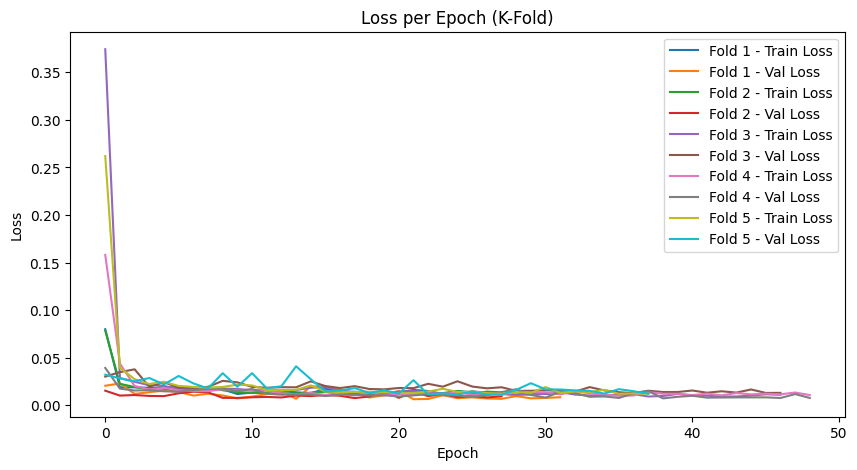

In [76]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

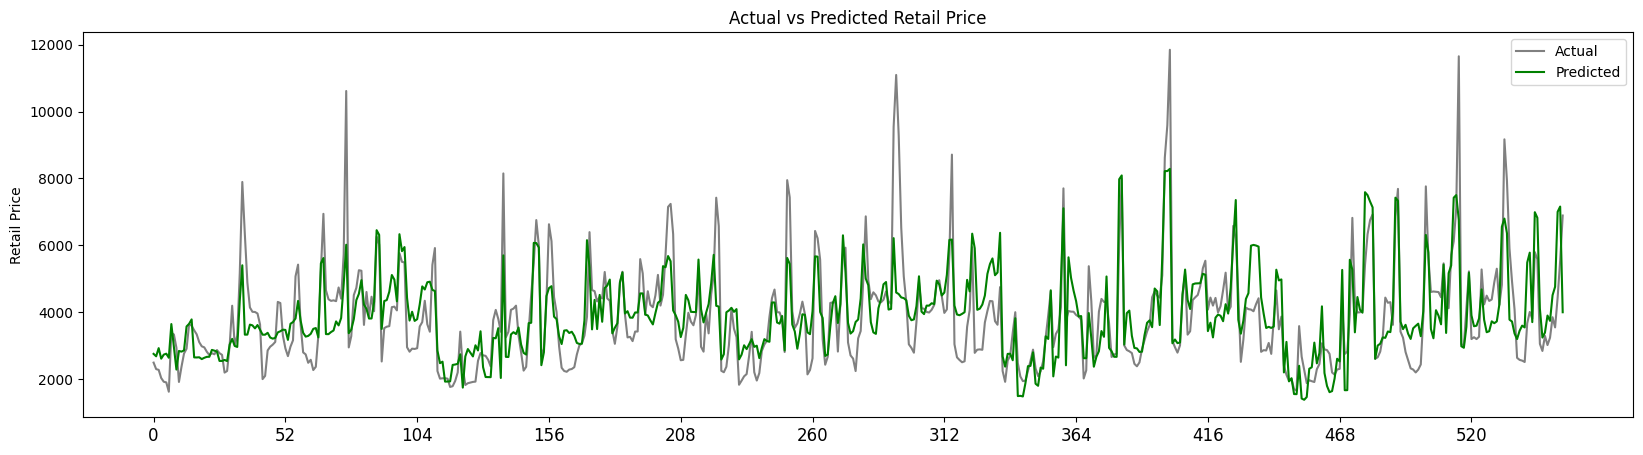

In [68]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()



## (3) Rnn

In [107]:
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping  # EarlyStopping 임포트


# 데이터 준비
X = cabage[['minTemp', 'avgTemp', 'export volume ', 'export value', 'market price']].values
y = cabage[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    rnn_model.add(Dropout(0.1))
    rnn_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.1)
    rnn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=140, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = rnn_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')


Fold 1
Epoch 1/140


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 44ms/step - loss: 0.3125 - mae: 0.4205 - val_loss: 0.0322 - val_mae: 0.1309
Epoch 2/140
45/45 - 0s - 3ms/step - loss: 0.0905 - mae: 0.2356 - val_loss: 0.0563 - val_mae: 0.2164
Epoch 3/140
45/45 - 0s - 3ms/step - loss: 0.0351 - mae: 0.1379 - val_loss: 0.0431 - val_mae: 0.1849
Epoch 4/140
45/45 - 0s - 3ms/step - loss: 0.0352 - mae: 0.1421 - val_loss: 0.0436 - val_mae: 0.1674
Epoch 5/140
45/45 - 0s - 3ms/step - loss: 0.0365 - mae: 0.1472 - val_loss: 0.0470 - val_mae: 0.1970
Epoch 6/140
45/45 - 0s - 3ms/step - loss: 0.0584 - mae: 0.1964 - val_loss: 0.0216 - val_mae: 0.1237
Epoch 7/140
45/45 - 0s - 3ms/step - loss: 0.0406 - mae: 0.1474 - val_loss: 0.0175 - val_mae: 0.0879
Epoch 8/140
45/45 - 0s - 3ms/step - loss: 0.0592 - mae: 0.1878 - val_loss: 0.1236 - val_mae: 0.3308
Epoch 9/140
45/45 - 0s - 3ms/step - loss: 0.1159 - mae: 0.2827 - val_loss: 0.1162 - val_mae: 0.3137
Epoch 10/140
45/45 - 0s - 3ms/step - loss: 0.0877 - mae: 0.2447 - val_loss: 0.0316 - val_mae: 0.1283
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 42ms/step - loss: 0.2599 - mae: 0.3788 - val_loss: 0.0308 - val_mae: 0.1533
Epoch 2/140
45/45 - 0s - 3ms/step - loss: 0.0375 - mae: 0.1496 - val_loss: 0.0518 - val_mae: 0.2060
Epoch 3/140
45/45 - 0s - 3ms/step - loss: 0.0360 - mae: 0.1451 - val_loss: 0.0172 - val_mae: 0.1011
Epoch 4/140
45/45 - 0s - 3ms/step - loss: 0.0433 - mae: 0.1608 - val_loss: 0.0384 - val_mae: 0.1770
Epoch 5/140
45/45 - 0s - 3ms/step - loss: 0.0654 - mae: 0.1990 - val_loss: 0.0912 - val_mae: 0.2791
Epoch 6/140
45/45 - 0s - 3ms/step - loss: 0.0589 - mae: 0.1889 - val_loss: 0.0202 - val_mae: 0.1190
Epoch 7/140
45/45 - 0s - 3ms/step - loss: 0.0393 - mae: 0.1514 - val_loss: 0.0653 - val_mae: 0.2354
Epoch 8/140
45/45 - 0s - 3ms/step - loss: 0.2592 - mae: 0.4318 - val_loss: 0.0495 - val_mae: 0.1996
Epoch 9/140
45/45 - 0s - 3ms/step - loss: 0.0645 - mae: 0.2024 - val_loss: 0.1939 - val_mae: 0.4201
Epoch 10/140
45/45 - 0s - 3ms/step - loss: 0.0458 - mae: 0.1629 - val_loss: 0.0185 - val_mae: 0.1103
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 37ms/step - loss: 0.6944 - mae: 0.6285 - val_loss: 0.2271 - val_mae: 0.4491
Epoch 2/140
45/45 - 0s - 3ms/step - loss: 0.1514 - mae: 0.3051 - val_loss: 0.0872 - val_mae: 0.2494
Epoch 3/140
45/45 - 0s - 3ms/step - loss: 0.0417 - mae: 0.1561 - val_loss: 0.0240 - val_mae: 0.1174
Epoch 4/140
45/45 - 0s - 3ms/step - loss: 0.0210 - mae: 0.1080 - val_loss: 0.0229 - val_mae: 0.1009
Epoch 5/140
45/45 - 0s - 3ms/step - loss: 0.0360 - mae: 0.1466 - val_loss: 0.0696 - val_mae: 0.2239
Epoch 6/140
45/45 - 0s - 3ms/step - loss: 0.0386 - mae: 0.1547 - val_loss: 0.1632 - val_mae: 0.3803
Epoch 7/140
45/45 - 0s - 3ms/step - loss: 0.0616 - mae: 0.2036 - val_loss: 0.0258 - val_mae: 0.1110
Epoch 8/140
45/45 - 0s - 3ms/step - loss: 0.0303 - mae: 0.1371 - val_loss: 0.0203 - val_mae: 0.0961
Epoch 9/140
45/45 - 0s - 3ms/step - loss: 0.0280 - mae: 0.1322 - val_loss: 0.0184 - val_mae: 0.0943
Epoch 10/140
45/45 - 0s - 3ms/step - loss: 0.0233 - mae: 0.1188 - val_loss: 0.0380 - val_mae: 0.1489
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 41ms/step - loss: 1.0162 - mae: 0.7429 - val_loss: 0.1864 - val_mae: 0.4043
Epoch 2/140
45/45 - 0s - 3ms/step - loss: 0.1830 - mae: 0.3373 - val_loss: 0.0511 - val_mae: 0.1696
Epoch 3/140
45/45 - 0s - 3ms/step - loss: 0.0469 - mae: 0.1703 - val_loss: 0.0255 - val_mae: 0.1167
Epoch 4/140
45/45 - 0s - 3ms/step - loss: 0.0320 - mae: 0.1404 - val_loss: 0.0472 - val_mae: 0.1593
Epoch 5/140
45/45 - 0s - 3ms/step - loss: 0.0364 - mae: 0.1493 - val_loss: 0.0568 - val_mae: 0.2172
Epoch 6/140
45/45 - 0s - 3ms/step - loss: 0.0580 - mae: 0.1946 - val_loss: 0.0274 - val_mae: 0.1259
Epoch 7/140
45/45 - 0s - 3ms/step - loss: 0.0391 - mae: 0.1538 - val_loss: 0.0306 - val_mae: 0.1405
Epoch 8/140
45/45 - 0s - 3ms/step - loss: 0.0447 - mae: 0.1620 - val_loss: 0.0282 - val_mae: 0.1118
Epoch 9/140
45/45 - 0s - 3ms/step - loss: 0.0532 - mae: 0.1787 - val_loss: 0.0227 - val_mae: 0.1021
Epoch 10/140
45/45 - 0s - 3ms/step - loss: 0.0624 - mae: 0.2067 - val_loss: 0.0269 - val_mae: 0.1261
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 37ms/step - loss: 0.9772 - mae: 0.6603 - val_loss: 0.0327 - val_mae: 0.1309
Epoch 2/140
45/45 - 0s - 4ms/step - loss: 0.1450 - mae: 0.2981 - val_loss: 0.0391 - val_mae: 0.1384
Epoch 3/140
45/45 - 0s - 3ms/step - loss: 0.0424 - mae: 0.1621 - val_loss: 0.0280 - val_mae: 0.1346
Epoch 4/140
45/45 - 0s - 3ms/step - loss: 0.0316 - mae: 0.1357 - val_loss: 0.0300 - val_mae: 0.1438
Epoch 5/140
45/45 - 0s - 3ms/step - loss: 0.0321 - mae: 0.1368 - val_loss: 0.0828 - val_mae: 0.2619
Epoch 6/140
45/45 - 0s - 3ms/step - loss: 0.0575 - mae: 0.1937 - val_loss: 0.0416 - val_mae: 0.1428
Epoch 7/140
45/45 - 0s - 3ms/step - loss: 0.0346 - mae: 0.1425 - val_loss: 0.0302 - val_mae: 0.1467
Epoch 8/140
45/45 - 0s - 3ms/step - loss: 0.0338 - mae: 0.1439 - val_loss: 0.0286 - val_mae: 0.1384
Epoch 9/140
45/45 - 0s - 4ms/step - loss: 0.0260 - mae: 0.1222 - val_loss: 0.0269 - val_mae: 0.1202
Epoch 10/140
45/45 - 0s - 4ms/step - loss: 0.0424 - mae: 0.1628 - val_loss: 0.0333 - val_mae: 0.1559
Epoch 11/1

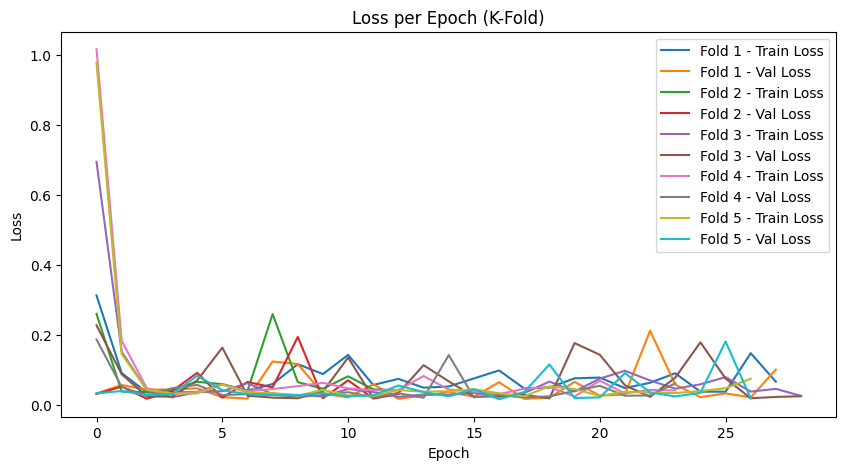

In [108]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

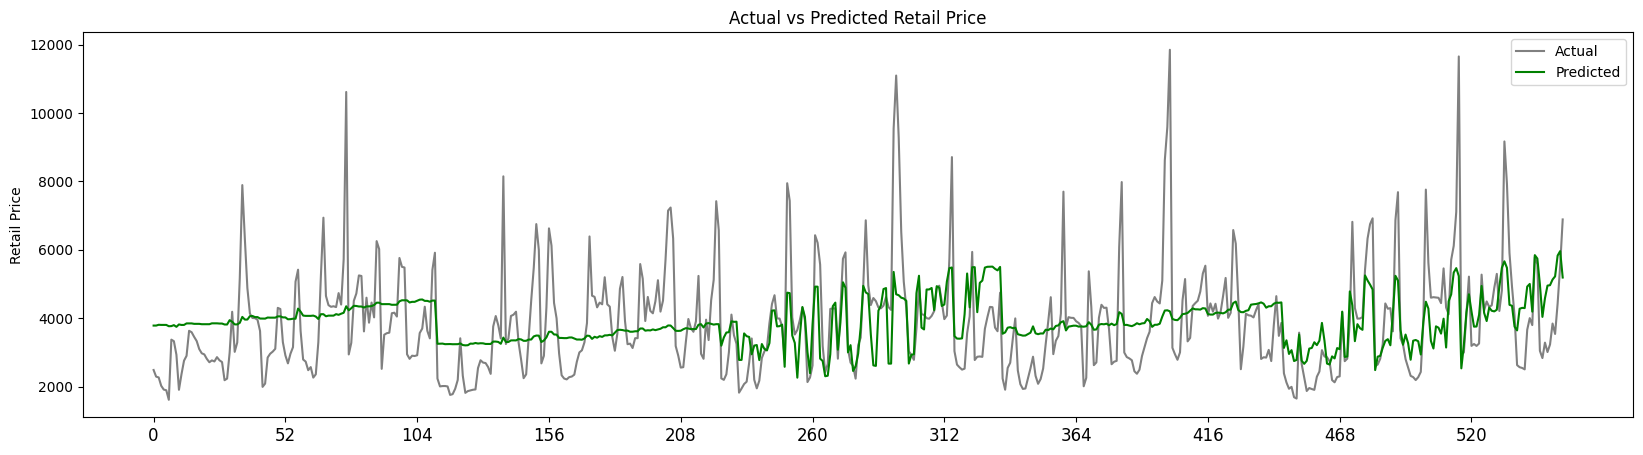

In [109]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()



# 5. shap value

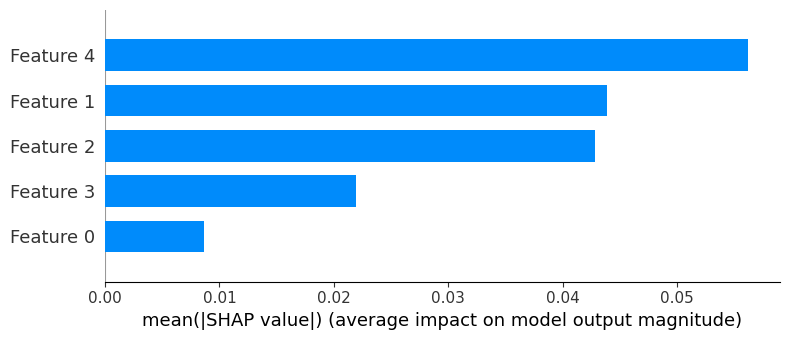

In [110]:
import shap

# 1. 해석하고자 하는 모델을 정규화된 데이터를 기반으로 SHAP 계산
explainer = shap.Explainer(lstm_model, X_scaled)  # rnn_model 사용
# SHAP 계산 (검증 데이터로 해석)
shap_values = explainer(X_val.reshape(X_val.shape[0], X_val.shape[1]))  # 2D 형태로 변환

# 2. SHAP 시각화
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]), plot_type='bar')


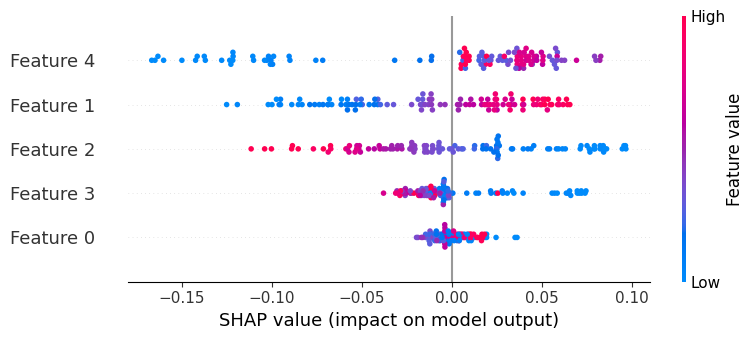

In [111]:
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]))

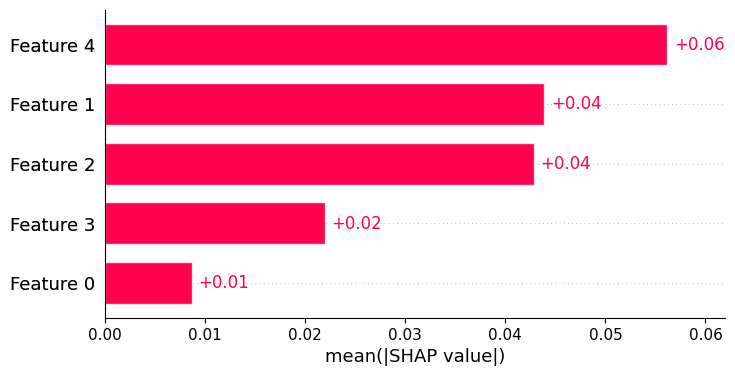

In [112]:
shap.plots.bar(shap_values)

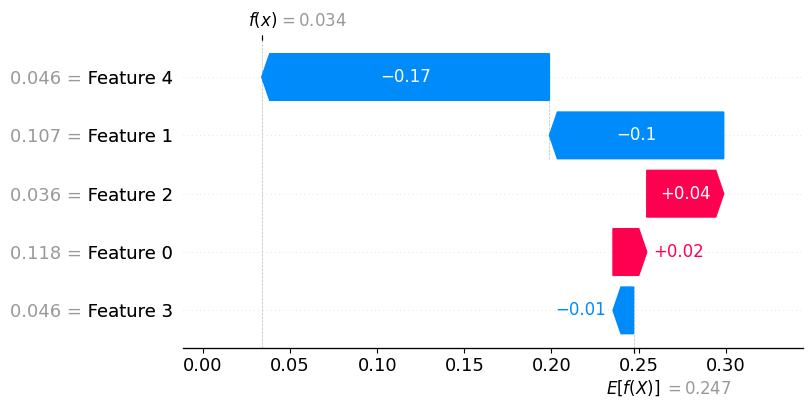

In [113]:
shap.plots.waterfall(shap_values[0])

# 음수 : 피쳐가 예측값을 감소시키는데 기여함. 
# 양수 : 피쳐가 예측값을 증가시키는데 기여함.

# 6. 가격 예측

In [114]:
# 데이터 준비
X = cabage[['minTemp', 'avgTemp', 'export volume ']].iloc[:-1]  # 555행까지
y = cabage['retail price'].iloc[:-1]  # 555행까지

# 데이터 스케일링
scalerX = MinMaxScaler()
X_scaled = scalerX.fit_transform(X)

scalerY = MinMaxScaler()
y_scaled = scalerY.fit_transform(y.values.reshape(-1, 1))

# 시퀀스 데이터 생성 함수
def create_dataset(X, y, time_step=1, future_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step - future_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step + future_step])
    return np.array(Xs), np.array(ys)

In [115]:
# 시퀀스 길이 설정
time_step = 4

# 시퀀스 데이터 생성
X_seq, y_seq = create_dataset(X_scaled, y_scaled, time_step)

# 데이터 형태 변경
X_seq = X_seq.reshape(X_seq.shape[0], X_seq.shape[1], X_seq.shape[2])

In [116]:
# 모델 구성
model = Sequential()
model.add(LSTM(32, activation='tanh', input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Early Stopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
model.fit(X_seq, y_seq, epochs=50, batch_size=10, verbose=2, callbacks=[early_stopping])

Epoch 1/50


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 - 2s - 29ms/step - loss: 0.0253 - mae: 0.1220
Epoch 2/50
56/56 - 0s - 2ms/step - loss: 0.0179 - mae: 0.1043
Epoch 3/50


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


56/56 - 0s - 2ms/step - loss: 0.0172 - mae: 0.1018
Epoch 4/50
56/56 - 0s - 2ms/step - loss: 0.0164 - mae: 0.0992
Epoch 5/50
56/56 - 0s - 2ms/step - loss: 0.0163 - mae: 0.0978
Epoch 6/50
56/56 - 0s - 2ms/step - loss: 0.0172 - mae: 0.1007
Epoch 7/50
56/56 - 0s - 2ms/step - loss: 0.0163 - mae: 0.0983
Epoch 8/50
56/56 - 0s - 2ms/step - loss: 0.0158 - mae: 0.0959
Epoch 9/50
56/56 - 0s - 2ms/step - loss: 0.0145 - mae: 0.0916
Epoch 10/50
56/56 - 0s - 3ms/step - loss: 0.0145 - mae: 0.0924
Epoch 11/50
56/56 - 0s - 3ms/step - loss: 0.0139 - mae: 0.0915
Epoch 12/50
56/56 - 0s - 2ms/step - loss: 0.0138 - mae: 0.0914
Epoch 13/50
56/56 - 0s - 2ms/step - loss: 0.0144 - mae: 0.0914
Epoch 14/50
56/56 - 0s - 2ms/step - loss: 0.0137 - mae: 0.0921
Epoch 15/50
56/56 - 0s - 2ms/step - loss: 0.0146 - mae: 0.0925
Epoch 16/50
56/56 - 0s - 2ms/step - loss: 0.0140 - mae: 0.0923
Epoch 17/50
56/56 - 0s - 2ms/step - loss: 0.0131 - mae: 0.0913
Epoch 18/50
56/56 - 0s - 2ms/step - loss: 0.0136 - mae: 0.0910
Epoch 19/5

In [117]:
# 마지막 시퀀스를 사용하여 556행의 retail price 예측
last_sequence = X_scaled[-time_step:].reshape((1, time_step, X_scaled.shape[1]))
predicted_price_scaled = model.predict(last_sequence)
predicted_price = scalerY.inverse_transform(predicted_price_scaled)

print(f"Predicted retail price for row 556: {predicted_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted retail price for row 556: 4538.45068359375


In [118]:
# 1주일 뒤 가격 예측
X_seq_week, y_seq_week = create_dataset(X_scaled, y_scaled, time_step, future_step=7)
last_sequence_week = X_scaled[-time_step:].reshape((1, time_step, X_scaled.shape[1]))
predicted_price_week_scaled = model.predict(last_sequence_week)
predicted_price_week = scalerY.inverse_transform(predicted_price_week_scaled)

print(f"Predicted retail price for 1 week later: {predicted_price_week[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted retail price for 1 week later: 4538.45068359375


In [119]:
# 1달 뒤 가격 예측
X_seq_month, y_seq_month = create_dataset(X_scaled, y_scaled, time_step, future_step=30)
last_sequence_month = X_scaled[-time_step:].reshape((1, time_step, X_scaled.shape[1]))
predicted_price_month_scaled = model.predict(last_sequence_month)
predicted_price_month = scalerY.inverse_transform(predicted_price_month_scaled)

print(f"Predicted retail price for 1 month later: {predicted_price_month[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted retail price for 1 month later: 4538.45068359375


In [120]:
# 1년 뒤 가격 예측
X_seq_year, y_seq_year = create_dataset(X_scaled, y_scaled, time_step, future_step=365)
last_sequence_year = X_scaled[-time_step:].reshape((1, time_step, X_scaled.shape[1]))
predicted_price_year_scaled = model.predict(last_sequence_year)
predicted_price_year = scalerY.inverse_transform(predicted_price_year_scaled)

print(f"Predicted retail price for 1 year later: {predicted_price_year[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted retail price for 1 year later: 4538.45068359375


# 7. 웹사이트

In [121]:
import streamlit as st
# py 파일로 바꾼후에 cmd에서 해당위치로 간 후, "streamlit run ~~.py" 명령어 실행하면 웹사이트가 나오는데, 그걸 배포해서 연결시키면 된다. 


# streamlit 앱 구성
st.set_page_config(page_title = "5대 농산물 가격 예측", layout = "wide")

# 사이드바 메뉴
st.sidebar.title("메뉴")
menu_options = ["배추", "양파", "마늘", "무", "고추"]
selected_option = st.sidebar.ratio("농산물 선택", menu_options)

# 제목 및 예측 가격 표시
st.title("5대 농산물 가격 예측")
predicted_price = ~~~ 



SyntaxError: invalid syntax (455537354.py, line 15)